# Plotting With Python

You can do a lot of data science and machine learning with python, but the techniques are useless if you're unable to communicate the story of the data to the outside world. Now this can be done through tables and words, but as they say a picture is worth a thousand words. 

In this notebook we'll take a tour through various plotting packages in python. We'll start with the foundation `matplotlib`, move on to more stunning plots with `seaborn`, and end with interactive visualizations with `bokeh`.

Let's go ahead and get started.

## matplotlib

Now I'm sure a number of you have experience with MATLAB. `matplotlib` was a project started by John Hunter in 2002 to enable MATLAB like plotting in python. If you've done a lot of plotting in MATLAB matplotlib will come very naturally to you. Let's start by importing the package, and setting it so that our plots will display properly in the notebook.

In [1]:
# matplotlib.pyplot contains most of the matplotlib functionality
# we'll need
import matplotlib.pyplot as plt

# Run this code to make plots display properly in notebooks
%matplotlib inline

In [53]:
# We'll use this package to generate data
import numpy as np

# We'll use pandas as well
import pandas as pd

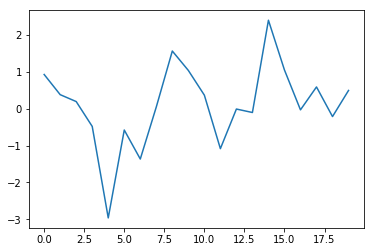

In [32]:
# Let's consider this command we've seen before
plt.plot(np.random.randn(20))

plt.show()

What did this command do? Well it plotted the `np array`, duh. Behind the scenes what is happening? `matplotlib` creates a figure object, and on that object it places a subplot object, and finally it places the points from our array on the subplot then connects the points with straight lines. This works well when we want to investigate a single plot, but perhaps we want more. We'll see how to manually create figure objects and subplots now.

In [33]:
# This creates a figure object
fig = plt.figure()
plt.show()

<Figure size 432x288 with 0 Axes>

Now nothing showed up because we didn't put a subplot on the figure. We can add a subplot onto the figure and then we'll see an empty box.

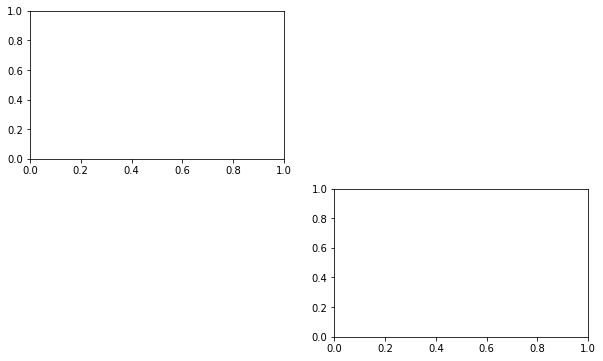

In [34]:
# We have to make a new figure each code block
# In jupyter the figure is reset each block
# We can set the figsize, the units are inches
fig = plt.figure(figsize = (10,6))

# let's add subplots!
fig.add_subplot(2, 2, 1)
fig.add_subplot(2, 2, 4)

# We added a plot in a 2 x 2 configuration in the 3rd position
plt.show()

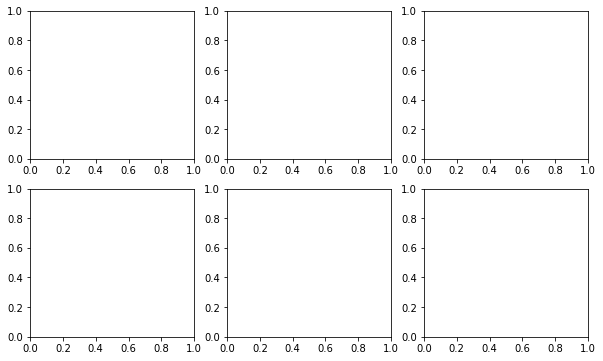

In [35]:
# That may have been annoying
# We can create a figure with many subplots at once
fig, axes = plt.subplots(2, 3, figsize = (10,6))

plt.show()

Now we've created some blank plots... how do we make them not.. blank.. plots?

Like so.

In [11]:
# import numpy to get some data
import numpy as np

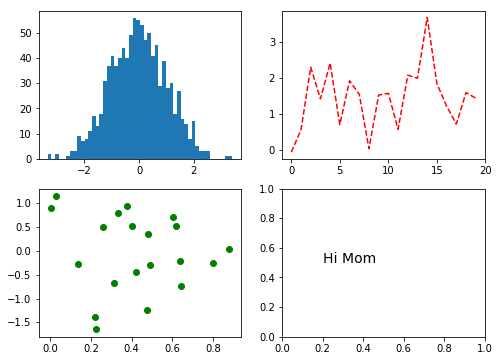

In [28]:
# fig is the figure object
# axes is an array of subplot objects
# you can index it like a list or array
fig, axes = plt.subplots(2, 2, figsize = (8,6))

# We'll plot a histogram on axes[0,0]
axes[0,0].hist(np.random.randn(1000), bins = 50)

# A random walk on axes[0,1]
axes[0,1].plot(np.random.randn(20).cumsum(),'r--')

# A scatter plot on axes[0,0]
axes[1,0].scatter(np.random.random(20), np.random.randn(20), color = 'g')

# Some text on axes[1,1]
axes[1,1].text(0.2, 0.5, "Hi Mom", fontsize = 14)

plt.show()

There are even more options we can add to our plots.

For instance notice that there is white space between the plots. We can adjust that with `plt.subplots_adjust` with the `wspace` and `hspace` arguments. These arguments accept a nonnegative number.

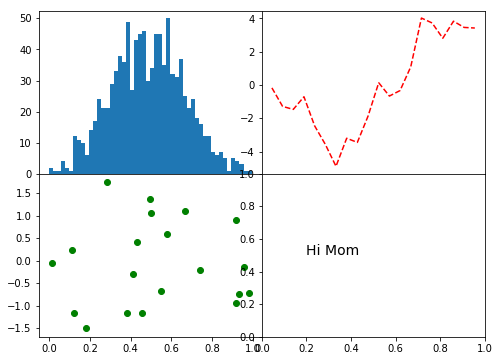

In [41]:
# Play around with vspace and hspace here
fig, axes = plt.subplots(2, 2, figsize = (8,6))

# We'll plot a histogram on axes[0,0]
axes[0,0].hist(np.random.randn(1000), bins = 50)

# A random walk on axes[0,1]
axes[0,1].plot(np.random.randn(20).cumsum(),'r--')

# A scatter plot on axes[0,0]
axes[1,0].scatter(np.random.random(20), np.random.randn(20), color = 'g')

# Some text on axes[1,1]
axes[1,1].text(0.2, 0.5, "Hi Mom", fontsize = 14)

plt.subplots_adjust(wspace = 0, hspace=0)

plt.show()

Try making wspace and hspace 0. Isn't it unappealing to have the vertical axes ticks overlap with the other plots? In this instance this probably indicates that we should leave some white space between the plots. However, there are instances where it makes snese to not have axis tick labels on each plot. For instance, say that the plots occur on the same scale, or we'd like to compare the outputs to see if there are differences. If we want the x and y axes to be the same for all the plots we can use the `sharex` and `sharey` commands.

Text(0, 0, 'Yay sharex and sharey')

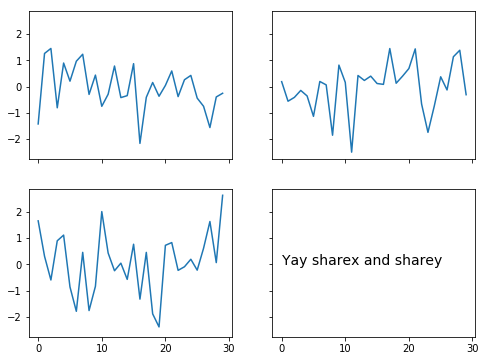

In [45]:
fig, axes = plt.subplots(2, 2, figsize = (8,6), sharex = True, sharey = True)

axes[0,0].plot(np.random.randn(30))
axes[0,1].plot(np.random.randn(30))
axes[1,0].plot(np.random.randn(30))
axes[1,1].text(0,0,"Yay sharex and sharey", fontsize = 14)

You may have noticed that we can control the appearance of what is plotted. Here's a quick cheatsheet:



| Color           | Description  |
| :-------------: |:------------:|
| r               | red          |
| b               | blue         |
| k               | black        |
| g               | green        |
| y               | yellow       |
| m               | magenta      |
| c               | cyan         |
| w               | white        |

|Line Style | Description   |
|:---------:|:-------------:|
| -         | Solid line    |
| --        | Dashed line   |
| :         | Dotted line   |
| -.        | Dash-dot line |

| Marker | Description    |
|:------:|:--------------:|
|o       | Circle         |
|+       | Plus Sign      |
|*       | Asterisk       |
|.       | Point          |
| x      | Cross          |
| s      | Square         |
|d       | Diamond        |
|^       | Up Triangle    |
|<       | Right Triangle |
|>       | Left Triangle  |
|p       | Pentagram      |
| h      | hexagram       |



#### Practice :D

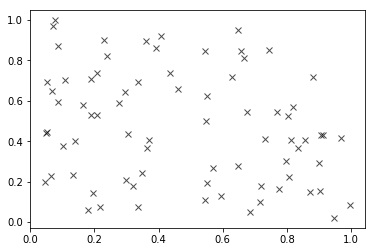

In [51]:
fig, ax = plt.subplots(1,1)

n = 75

ax.plot(np.random.random(n), np.random.random(n),'kx',alpha = .7)

# Play around with the following commands
# ax.get_xlim()
# ax.set_ylim()
# ax.xlabel()
# ax.set_xticks()
# ax.set_xticklabels()

plt.show()

We'll finish up our `matplotlib` section by adding legends to our plots and then seeing how we can add shapes to our plots.

We'll examine legends with the iris data set.

In [121]:
iris = pd.read_csv("iris.csv")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


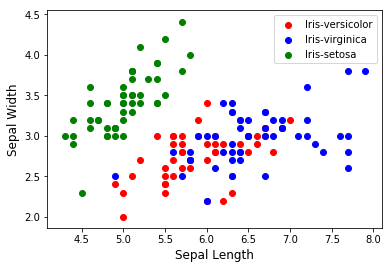

In [93]:
classes = list(set(iris['class']))
colors = ['red','blue','green']

for i in range(len(classes)):
    subset = iris.loc[iris['class'] == classes[i],['sepal_length','sepal_width']]
    # label is used to identify the points that were plotted
    plt.scatter(subset.sepal_length, subset.sepal_width, color = colors[i], label = classes[i])

plt.xlabel("Sepal Length", fontsize = 12)
plt.ylabel("Sepal Width", fontsize = 12)
    
# Now we insert the legend
# By default the legend is placed in the 'best' location
plt.legend()

plt.show()

#### Practice :D

In [71]:
beers = pd.read_csv('beer.csv')
beers.head()

,Beer_Name,IBU,ABV,Rating,Beer_Type
0,Guinness Draught,45,4.2,3.792,Stout
1,Breakfast Stout,60,8.3,4.145,Stout
2,Milk Stout Nitro,25,6.0,3.951,Stout
3,Dragon’s Milk,31,11.0,4.062,Stout
4,Old Rasputin,75,9.0,4.018,Stout


In [72]:
beers.tail()

,Beer_Name,IBU,ABV,Rating,Beer_Type
370,Golden Nugget IPA,45,6.8,4.000,IPA
371,Le Freak,101,9.2,3.778,IPA
372,Lil Heaven Session IPA,-99,4.8,3.687,IPA
373,White Rajah,70,6.8,4.015,IPA
374,Wrought Iron IPA,80,6.9,3.554,IPA


In [ ]:
# Plot IBU vs ABV for the beers dataframe
# plot IPA in red and Stouts in black











We'll end our `matplotlib` section with how to put shapes in a plot. The `matplotlib.patches` sub-package contains methods for making a number of shapes. Luckily we can make circles, rectangles, and triangles with just `matplotlib.pyplot`

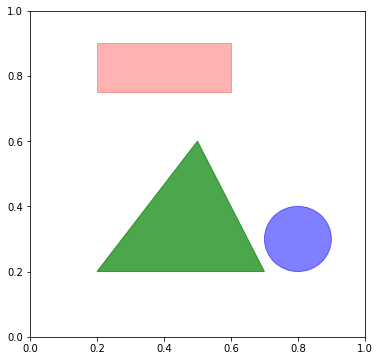

In [88]:
figure, ax = plt.subplots(1,1, figsize = (6,6))

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color = 'r', alpha = 0.3)
circ = plt.Circle((.8,.3), .1, color = 'b', alpha = .5)
pgon = plt.Polygon(((.2,.2), (.7,.2), (.5,.6)), color = 'g', alpha = .7)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

plt.show()

We're ready to move on from base `matplotlib`. Next we'll move on to `seaborn` a package built on top of `matplotlib`. If you'd like to learn more about `matplotlib` check out the documentation here: https://matplotlib.org

## Seaborn

`seaborn` is a powerful plotting package, if you've seen R's ggplot library the two are quite similar. It simplifies some of the work we had to do in `matplotlib`. Here's an example.

In [89]:
import seaborn as sns

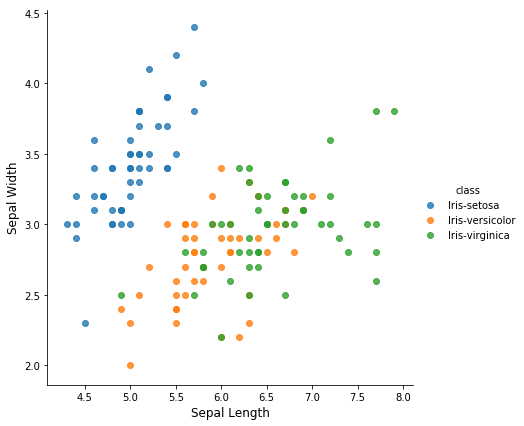

In [103]:
# We return to the iris data


# This plot makes a scatter plot, it will also fit a linear
# regression line, but we've told it not to with fit_reg = False
sns.lmplot(data = iris, x = 'sepal_length', y = 'sepal_width', hue = 'class', 
           fit_reg = False, height = 6, aspect = 1)
plt.xlabel("Sepal Length", fontsize = 12)
plt.ylabel("Sepal Width", fontsize = 12)

plt.show()

That was much nicer, we didn't need to make a for loop at all! We can also take advantage of the extra features `seaborn` offers. If we wanted a regression line with `matplotlib` we would have needed to fit the model and then plot the line. With `seaborn` we get it for free!

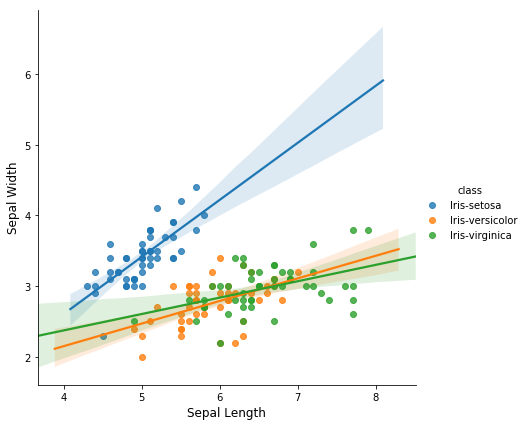

In [104]:
sns.lmplot(data = iris, x = 'sepal_length', y = 'sepal_width', 
           hue = 'class', height = 6, aspect = 1)
plt.xlabel("Sepal Length", fontsize = 12)
plt.ylabel("Sepal Width", fontsize = 12)

plt.show()

#### Practice :o

In [116]:
# Remake the ibu vs abu plot with different shaped markers
# for beer type










Now that we've seen how `seaborn` can make some plotting jobs easier. Let's see how we can use it to make statistically descriptive plots. Our examples will be histograms/density plots, box and whisker plots, and swarmplots.

### Histograms

Let's start with histograms.

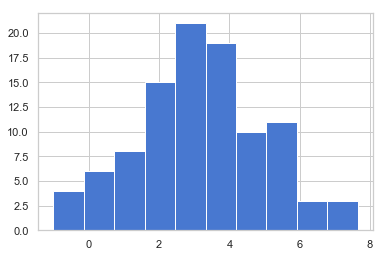

In [148]:
# First make some normal data
data = 2*np.random.randn(100) + 3

# distplot helps visualize the distribution for continuous data
sns.distplot(data, bins = 10, kde = False, hist_kws = {'alpha':1})

plt.show()

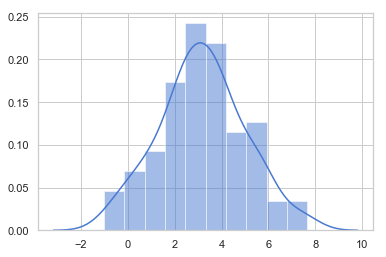

In [150]:
# Earlier we had kde = False, what if it was True?

sns.distplot(data, bins = 10, kde = True, hist_kws = {'alpha':.5})


plt.show()

#### Practice 8o

In [152]:
# It puts a kernel density estimate on top of the histogram
# There's an additional argument rug, examine what rug = True does
# Hint set kde = False







### Box and Whisker Plots

A box and whisker plot is an excellent way to better understand the distribution of a continuous variable. It creates a box where the bottom (or left) of the box is 25th percentile of the data, the middle line in the box corresponds to the median of the data, and the top corresponds to the 75th percentile of the data. There are also two whiskers that help cover the extremes of the data. Let's see one with the iris data.

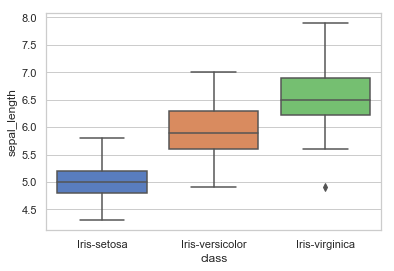

In [158]:
sns.boxplot(data = iris, x = 'class', y = 'sepal_length')

plt.show()

What if we want a horizontal box plot?

#### Practice

In [159]:
# Try to intuite how to make a horizontal box plot







Note we should be careful with boxplots. They can be misleading. What if in the iris data there were only 10 virginica flowers, but 90 setosa flowers. Here's a quick way around that, we'll see another example in the next section.

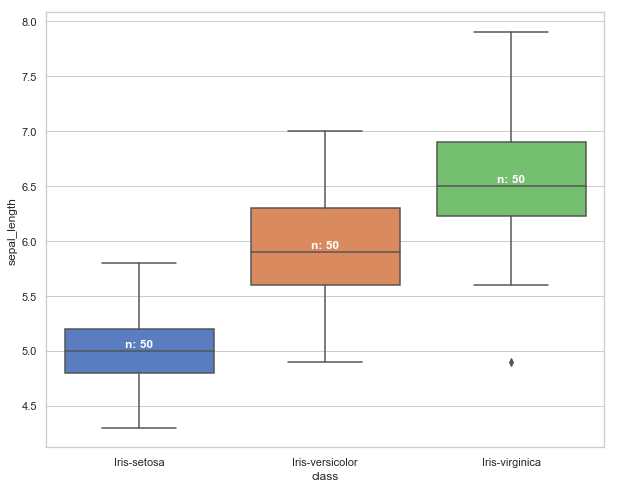

In [167]:
plt.figure(figsize = (10,8))
ax = sns.boxplot(x="class", y="sepal_length", data=iris)
 
# Calculate number of obs per group & median to position labels
medians = iris.groupby(['class'])['sepal_length'].median().values
nobs = iris['class'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
            horizontalalignment='center', size=12, 
            color='w', weight='semibold')
 
plt.show()

### Swarm plots

What's a swarm plot? Sounds weird.

Swarm plots are somewhat similar to box and whisker plots. The plot takes the observations and stacks them up one by one at the observation level. We'll see an example with a pokemon data set found here, https://elitedatascience.com/python-seaborn-tutorial.

In [176]:
pokemon = pd.read_csv("Pokemon.csv")

In [177]:
pokemon.head()

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [178]:
pokemon.describe()

,Number,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
count,151.000000,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781
std,43.734045,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832
min,1.000000,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,38.500000,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000
50%,76.000000,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000
75%,113.500000,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000
max,151.000000,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000,3.000000


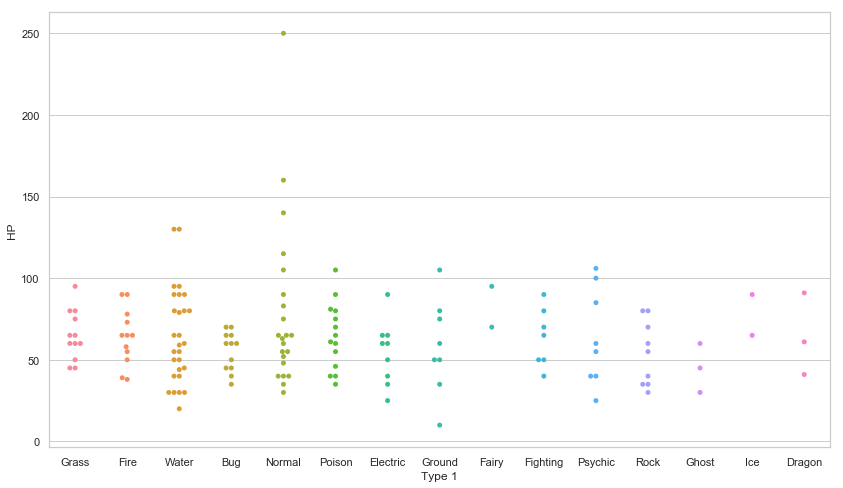

In [184]:
plt.figure(figsize = (14, 8))

sns.swarmplot(data = pokemon, x = 'Type 1', y = 'HP')

plt.show()

This is nice, but for any pokemon fan it isn't aesthetically pleasing, I mean pink for grass types... come on. We can fix that with the palette option. Also let's make the points larger.

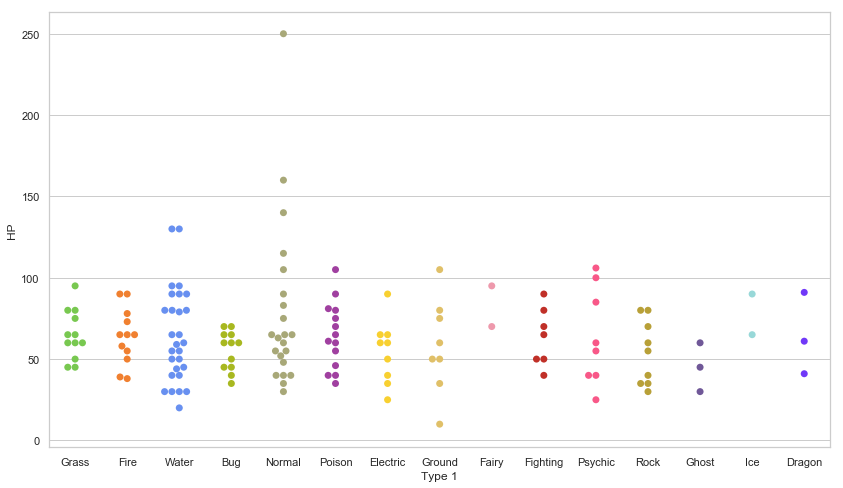

In [185]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

plt.figure(figsize = (14, 8))

sns.swarmplot(data = pokemon, x = 'Type 1', y = 'HP', 
              palette = pkmn_type_colors, size = 7)

plt.show()

There's another way we can use swarm plots to help us distinguish any potential systematic differences based on class. We first 'melt' a dataframe so that we have the categorical variable in one column and the relevant statistics in another column. We'll see this demonstrated below with the iris data.

In [187]:
iris = pd.read_csv("iris.csv")

# "Melt" the dataset to "long-form" or "tidy" representation
iris_melt = pd.melt(iris, "class", var_name="measurement")

iris_melt.head(10)

,class,measurement,value
0,Iris-setosa,sepal_length,5.1
1,Iris-setosa,sepal_length,4.9
2,Iris-setosa,sepal_length,4.7
3,Iris-setosa,sepal_length,4.6
4,Iris-setosa,sepal_length,5.0
5,Iris-setosa,sepal_length,5.4
6,Iris-setosa,sepal_length,4.6
7,Iris-setosa,sepal_length,5.0
8,Iris-setosa,sepal_length,4.4
9,Iris-setosa,sepal_length,4.9


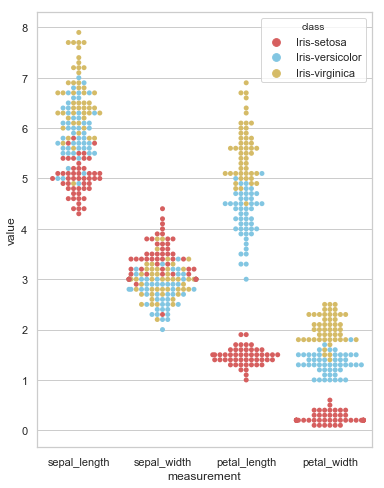

In [188]:
iris = pd.read_csv("iris.csv")

# "Melt" the dataset to "long-form" or "tidy" representation
iris_melt = pd.melt(iris, "class", var_name="measurement")

plt.figure(figsize=(6,8))
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x = "measurement", y = "value", hue = "class",
              palette = ["r", "c", "y"], data = iris_melt)

plt.show()

That seems pretty useful! We can see that there appears to be a clear cutoff in petal_length and petal_width for setosa and the other two irises.

That's it for `matplotlib` and `seaborn`. Before moving on to `bokeh` I'll leave the following practice problem for you to look at later. 

Also you can find the documentation for `seaborn` here, https://seaborn.pydata.org. We've only scratched the surface of `seaborn`, it can do a ton of cool stuff.

#### Practice :^)

Below I've written a bunch of code to make a plot. Go through it and convince yourself you understand it.